In [1]:
import pandas as pd
import numpy as np
from emnist import extract_training_samples
import matplotlib.pyplot as plt

print('importing characters')
latinImages, latinLabels = extract_training_samples('bymerge')
hiraganaImages = np.load('data/k49-train-imgs.npz')
hiraganaImages = hiraganaImages['arr_0']
hiraganaLabels = np.load('data/k49-train-labels.npz')
hiraganaLabels = hiraganaLabels['arr_0']

# maping datasets for using with asci codes
print('mapping characters')
map = pd.read_csv("data/mapping.txt", header=None, sep=' ')
map = map[1].to_dict()

latinNewLabels = []
for i, l in enumerate(latinLabels):
    latinNewLabels.append(map[l])

hiraganaNewLabels = []
for i, l in enumerate(hiraganaLabels):
    try:
        hiraganaNewLabels.append(map[l])
    except KeyError:
        hiraganaNewLabels.append(47)

# creating dictionary of letters from datasets
myEmnist = {}
for l in map:
    myEmnist[map[l]] = [x for i, x in enumerate(latinImages) if latinNewLabels[i] == map[l]]

myHiragana = {}
for l in map:
    myHiragana[map[l]] = [x for i, x in enumerate(hiraganaImages) if hiraganaNewLabels[i] == map[l]]

importing characters
mapping characters


0


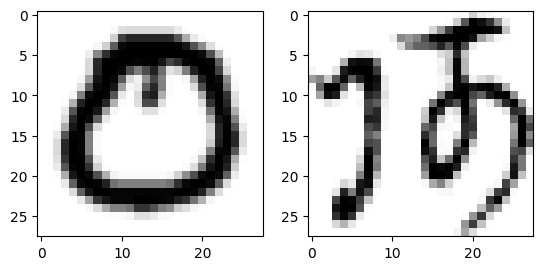

1


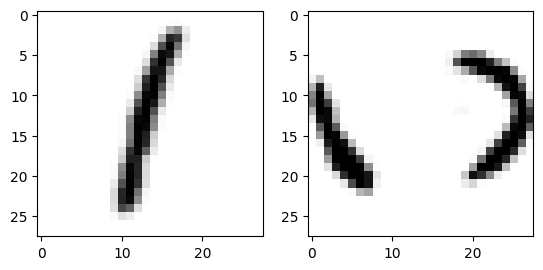

2


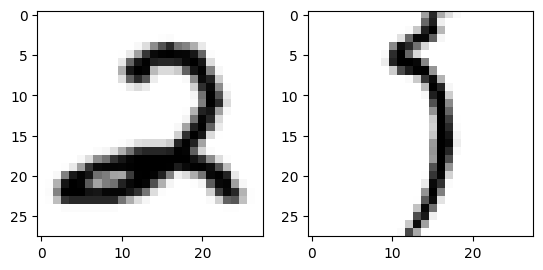

3


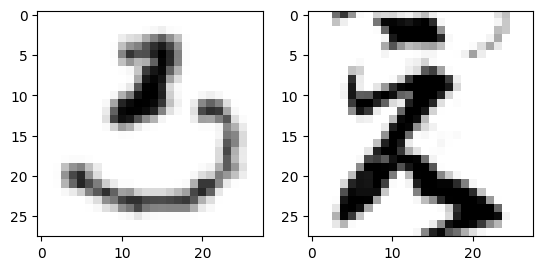

4


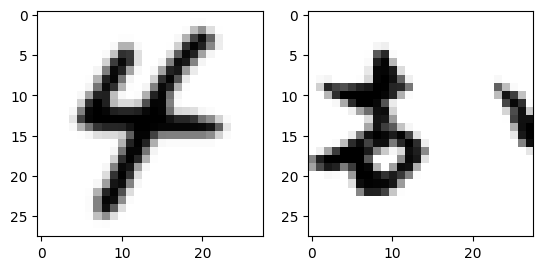

5


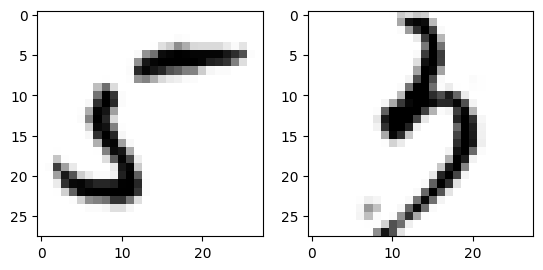

6


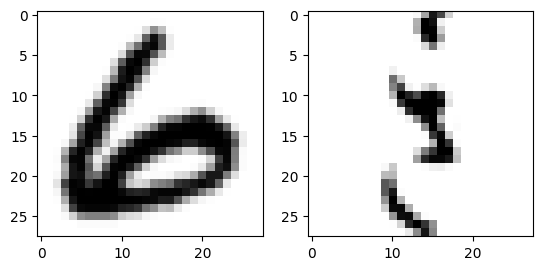

7


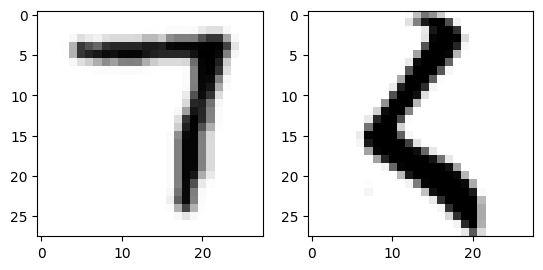

8


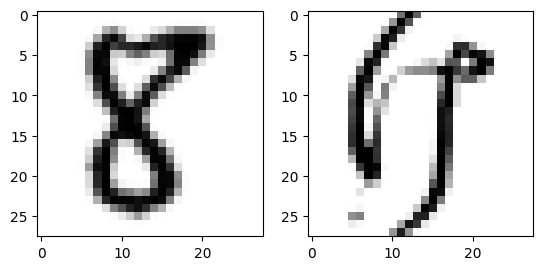

9


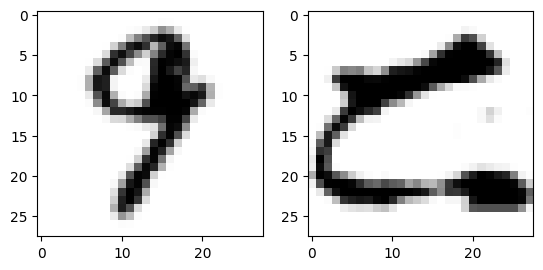

A


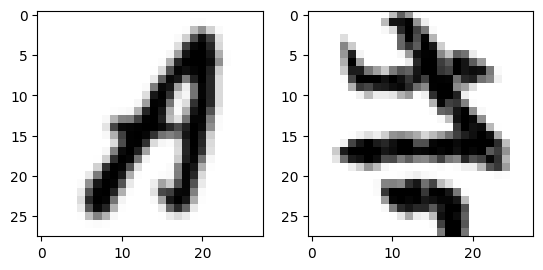

B


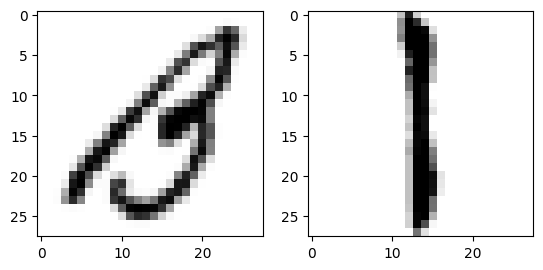

C


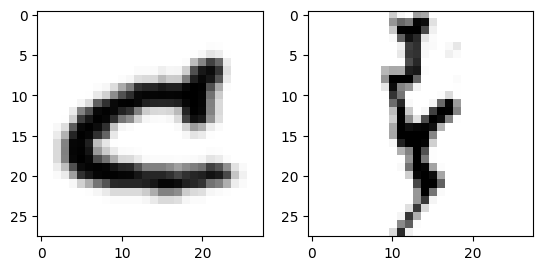

D


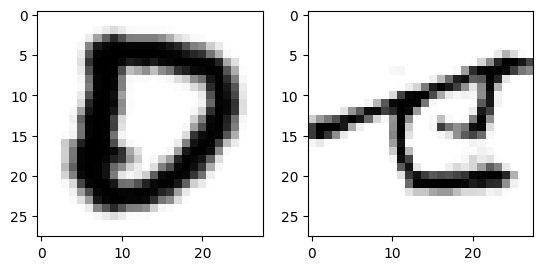

E


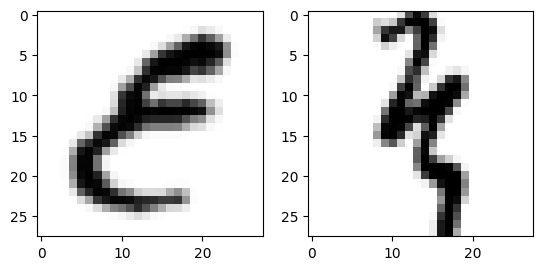

F


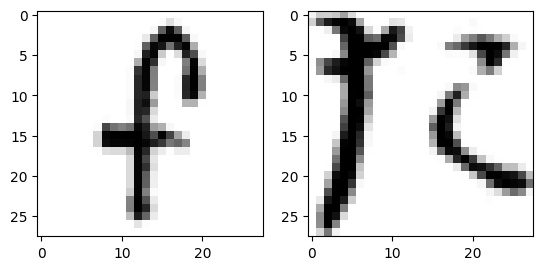

G


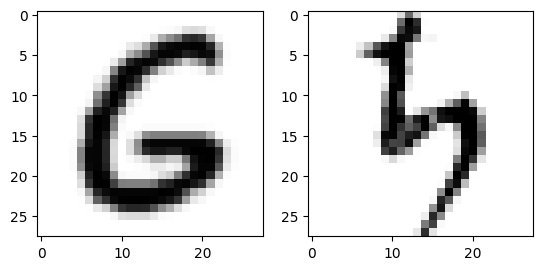

H


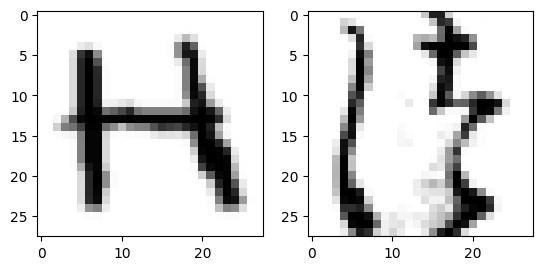

I


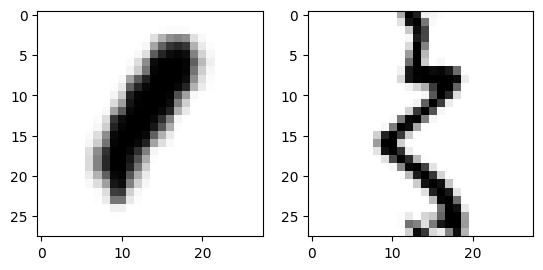

J


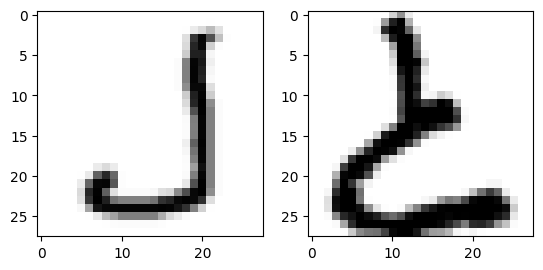

K


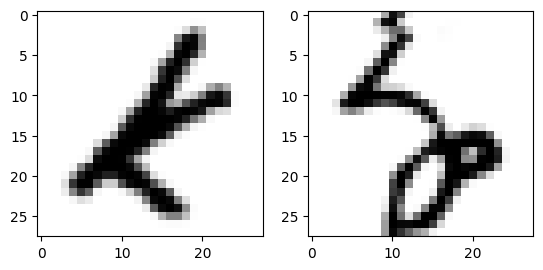

L


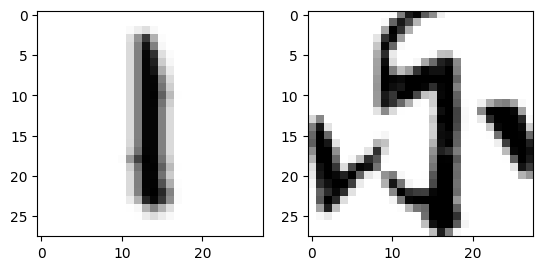

M


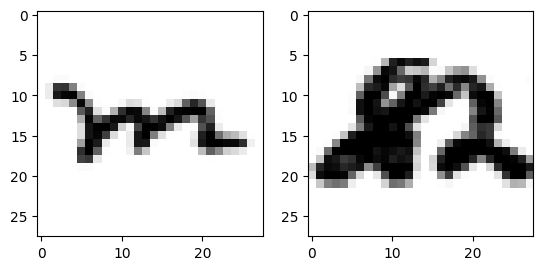

N


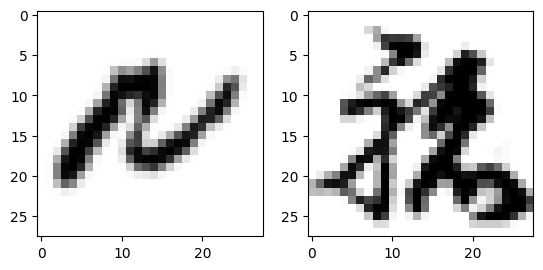

O


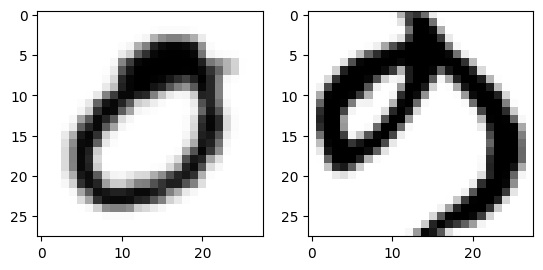

P


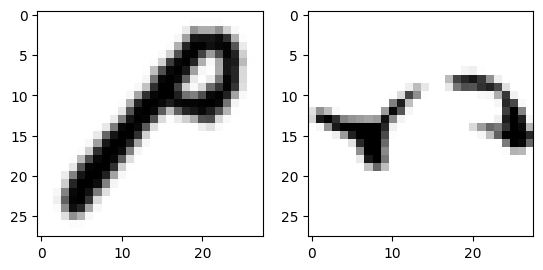

Q


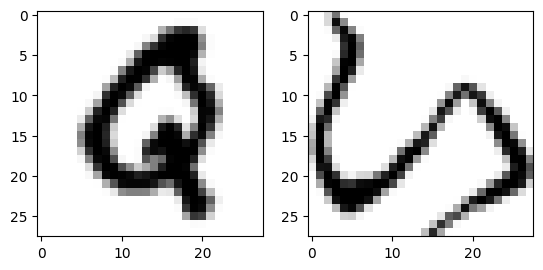

R


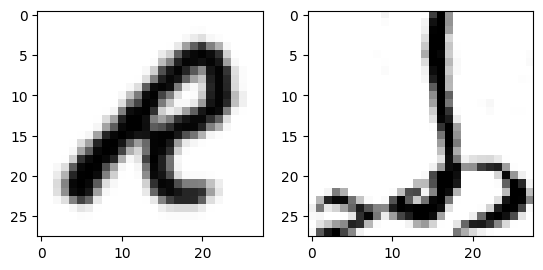

S


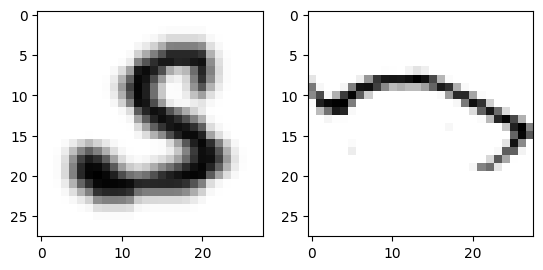

T


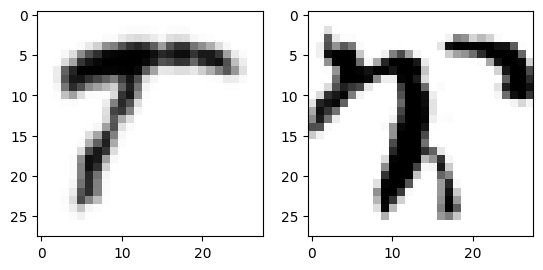

U


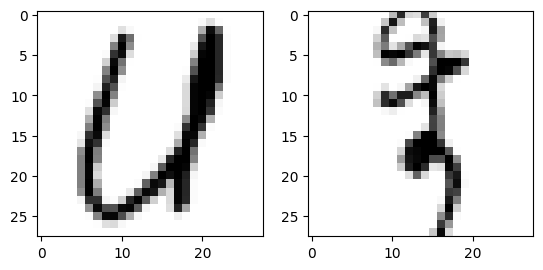

V


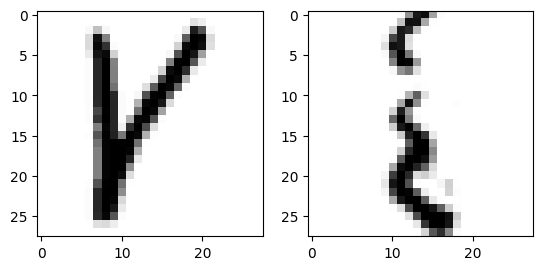

W


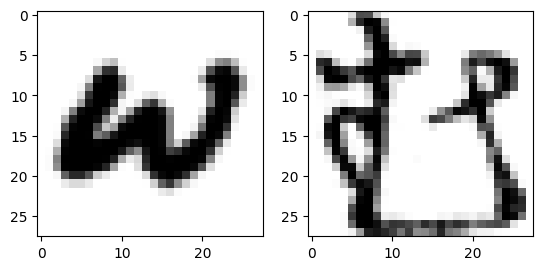

X


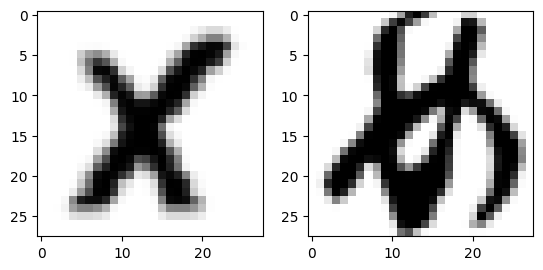

Y


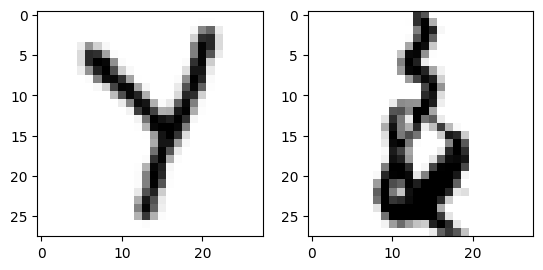

Z


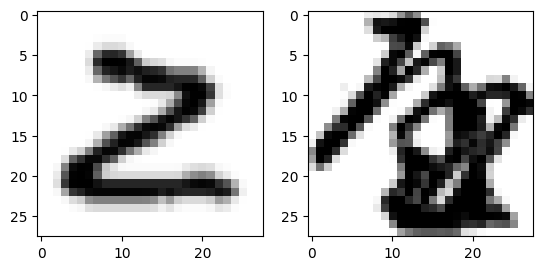

a


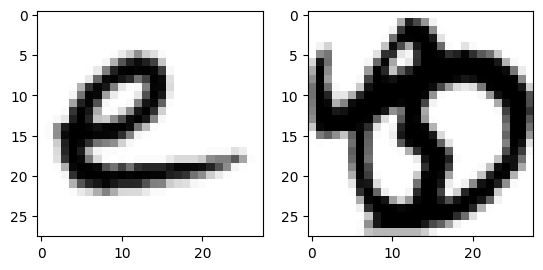

b


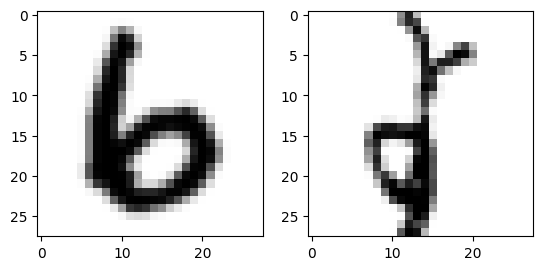

d


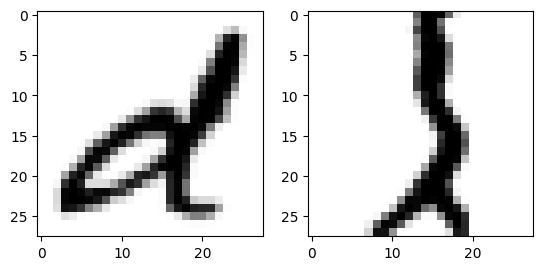

e


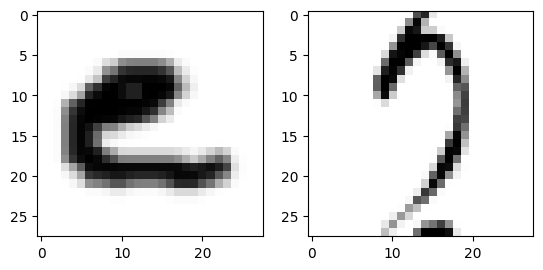

f


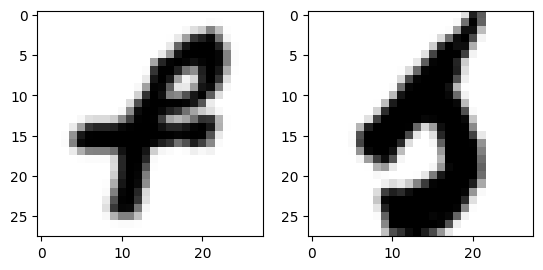

g


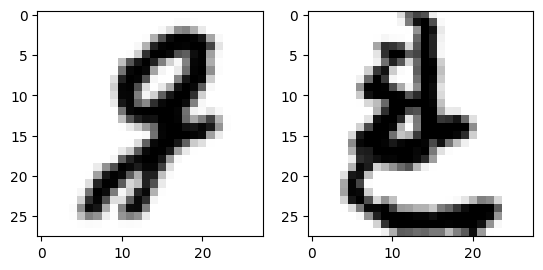

h


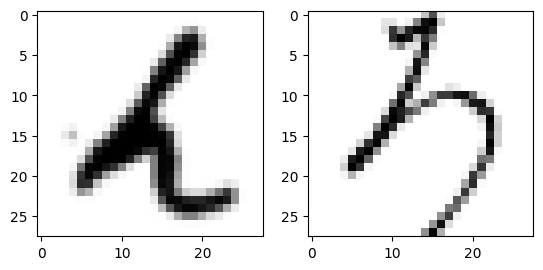

n


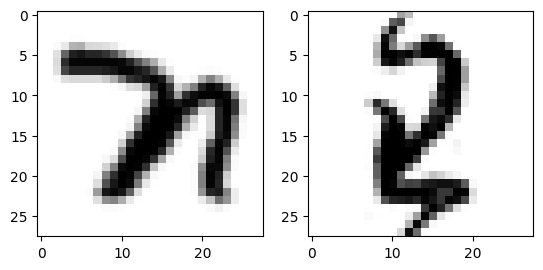

q


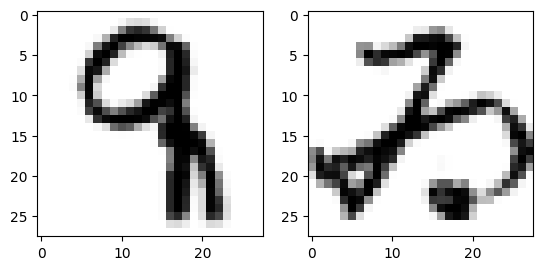

r


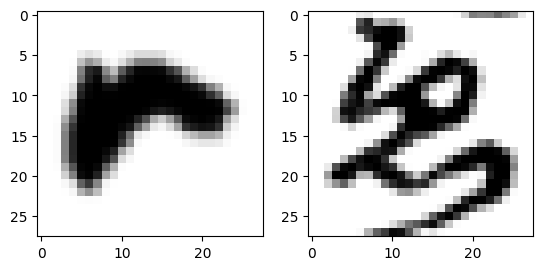

t


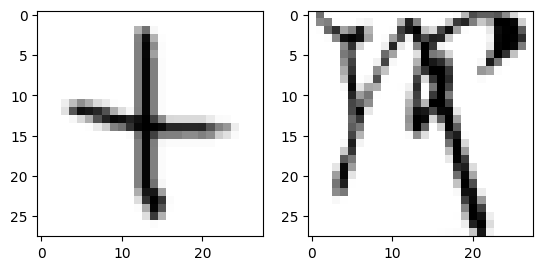

In [24]:
for i, l in enumerate(myEmnist):
    print(chr(l))
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(myEmnist[l][0],cmap='binary')
    axarr[1].imshow(myHiragana[l][0],cmap='binary')
    plt.show()